Aujourd'hui petit TP sur les bases de Pandas. Pandas est devenue la librairie la plus utilisée de Python pour les statistiques et la manipulation de bases de données. Elle permet surtout de faire le lien entre deux librairies : numpy pour la manipulation de bases de données et matplotlib pour la visualisation. En revanche, nous verrons que d'autres librairies proposent des visualisations alternatives plus esthétiques, didactiques ou au moins alternatives à matplotlib. Aujourd'hui nous verrons notamment une alternative très populaire : seaborn. 

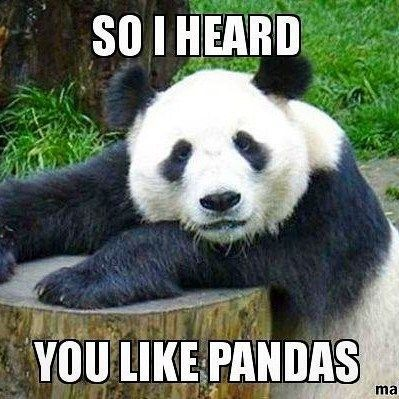

Commençons par importer les librairies qui nous seront utiles !

In [7]:
# Pandas la librairie préférée des datascientists sous Python (selon mon tout
# petit échantillon représentatif)
import pandas as pd
#Seaborn une librairie sympathique pour la data visualization 
import seaborn as sb
#Son extension seaborn objets (elle nous servira pour les stripplots)
import seaborn.objects as so
# Matplotlib.pyplot, des fonctions et objets de matplotlib qui 
# ne sont pas inclue dans pandas
import matplotlib.pyplot as plt

PARTIE I : Manipulation des bases de données

Supposons qu'avant d'importer ma base de données je veuille plus d'informations sur la fonction que je vais utiliser. J'utilise donc la fonction help qui est une fonction de base de python qui me donne la documentation d'une fonction. J'y trouve les arguments à y insérer et les décrit. 

In [5]:
help(pd.read_csv)

NameError: name 'pd' is not defined

On va maintenant pouvoir importer notre base de données. En général on importe des données CSV (comma separated values), des bases de données compressées en collant toutes les cellules d'une ligne et en les séparant par des virgules ou points-virgules.
Attention !!! Quelques problèmes fréquents : 
1) Un fichier CSV peut avoir comme séparateur la virgule, le point-virgule ou plus rarement la tabulation. Si on n'arrive pas à ouvrir sa base de données on peut vérifier si le problème vient de là. Si oui, on peut rajouter l'argument sep = "..." (par exemple si dans notre fichier le séparateur est un point-virgule sep = ";")
2) L'encodage est un problème que l'on rencontre fréquemment si la base de données contient des accents ou des caractères latins. On doit alors vérifier que python importe bien la base dans le format "UTF-8" et que notre base est bien codée dans ce format. Si elle ne l'est pas on peut régler le problème avec Excel.

Ici on importe une base de données Excel parce que c'est le format natif du baromètre du numérique. La fonction est un peu différente, c'est read_excel de pandas.

In [9]:
#On importe le baromètre du numérique (ici il faut trouver le bon lien 
# en s'adaptant à votre ordinateur)
df = pd.read_excel("C:/Users/cypri/OneDrive/Bureau/Cours Télécom Paris/HSS_4MO18/TP/Séance 1/barometre-du-numerique-2023.xlsx")

Quelques fonctions utiles pour examiner rapidement les principales caractéristiques de notre base de données : 
1) head : imprime les premières lignes du jeu de données (on peut lui indiquer entre parenthèses combien) (nb : ici la base est constituée d'un jeu de données donc les deux termes sont un peu rendondants)
2) shape : imprime le nombre de lignes et de colonnes
3) info : imprime le nombre de ligness, de colonnes et quelques autres informations (taille de l'objet, nombre de variable quantitatives, ...)
4) describe : imprime des informations de base sur les variables quantitatives de la base : somme, moyenne, écart-type, minimum, ...
5) values : imprime les différentes modalités des variables catégorielles
6) columns: imprime le nom des colonnes du jeu de données

In [10]:
df.head(3)
print(df.shape)
print(df.info())
print(df.describe())
print(df.values)
print(df.columns)

(4284, 263)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Columns: 263 entries, ANNEENQ to REV_TR7
dtypes: float64(25), int64(4), object(234)
memory usage: 8.6+ MB
None
       ANNEENQ         POND       NBPERS       NBTIC1       NBTIC2  \
count   4284.0  4284.000000  4284.000000  4279.000000  4280.000000   
mean    2023.0     1.000000     2.430906     2.056088     1.592056   
std        0.0     0.543657     1.343132     1.583173     1.222953   
min     2023.0     0.290337     1.000000     0.000000     0.000000   
25%     2023.0     0.624133     1.000000     1.000000     1.000000   
50%     2023.0     0.874689     2.000000     2.000000     1.000000   
75%     2023.0     1.186910     3.000000     3.000000     2.000000   
max     2023.0     3.463192    12.000000    15.000000    15.000000   

            NBTIC3       NBTIC5  NBTIC5_NOWEB       NBTIC6  NBTIC6_NOWEB  ...  \
count  4279.000000  3678.000000   3427.000000  3680.000000   3429.000000  ...   
mean      

On peut ensuite classer les lignes/individus en fonction des valeurs d'une ou de plusieurs variables. Attention, on ne trie pas qu'une seule colonne avec sort_values (d'ailleurs c'est peu utile), on trie toutes les colonnes. On choisit aussi si on trie paar ordre croissant ou décroissant avec ascending = [True] pour croissant et ascending = [False] pour décroissant. 

In [11]:
#On trie les individus par ordre décroissant du nombre de personnes dans leur foyer
df.sort_values(['NBPERS'], ascending = [False])

,ANNEENQ,RECUEIL,POND,AGE6FUZ,AGGLO5,REGION,TYPLOG,TYPLOG2,NBPERS,NBPERS5,...,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10,ENV11,ENV6EXP_1,ENV6EXP_2,REV_TR7
1994,2023,CAWI,0.632694,60-69 ans,Communes rurales,Normandie,Maison,Maison individuelle,12,Cinq personnes et plus,...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,"Oui, pour des raisons environnementales","Oui, pour des raisons environnementales",De 900 à 1500 euros
3138,2023,CAWI,0.359479,18-24 ans,100 000 habitants et plus,Occitanie,"Autre (chambre d’hôtel, centre d’hébergement e...",Logement collectif,10,Cinq personnes et plus,...,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,Non,Non,"Non déclaré (ne sait pas, refus)"
3453,2023,CAWI,0.683777,18-24 ans,2 000 à 19 999 habitants,Bretagne,Maison,Maison individuelle,9,Cinq personnes et plus,...,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,Non,Non,3100 à 4000 euros
3592,2023,CAWI,2.514056,12-17 ans,Agglomération parisienne,Ile de France,Appartement,Logement collectif,9,Cinq personnes et plus,...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,"Oui, en raison du prix","Oui, en raison du prix","Non déclaré (ne sait pas, refus)"
3134,2023,CAWI,0.633847,40-59 ans,2 000 à 19 999 habitants,Grand Est,"Autre (chambre d’hôtel, centre d’hébergement e...",Logement collectif,8,Cinq personnes et plus,...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Non,Non,4000 euros et plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,2023,CAWI,1.267874,40-59 ans,100 000 habitants et plus,Auvergne - Rhône Alpes,Appartement,Logement collectif,1,Une personne,...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Non,Non,De 1500 à 2300 euros
2072,2023,CAWI,0.734740,40-59 ans,100 000 habitants et plus,Pays de la Loire,Appartement,Logement collectif,1,Une personne,...,Oui je le fais déjà,Je ne le fais pas et je ne compte pas le faire...,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Non,Non,De 1500 à 2300 euros
2065,2023,CAWI,0.397577,70 ans et plus,100 000 habitants et plus,Occitanie,Maison,Maison individuelle,1,Une personne,...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Je ne le fais pas et je ne compte pas le faire...,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Non,Non,De 2300 à 3100 euros
2063,2023,CAWI,0.593318,70 ans et plus,20 000 à 99 999 habitants,Hauts de France,Maison,Maison individuelle,1,Une personne,...,Oui je le fais déjà,ne sait pas,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Non,Non,De 900 à 1500 euros


On peut faire de même mais avec plusieurs variables de classement. 

In [12]:
#On trie les individus par ordre décroissant du nombre de personnes dans leur foyer 
#et à nombre de personnes égales par type de logement. 
df.sort_values(['NBPERS', 'TYPLOG'], ascending = [False, True])

,ANNEENQ,RECUEIL,POND,AGE6FUZ,AGGLO5,REGION,TYPLOG,TYPLOG2,NBPERS,NBPERS5,...,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10,ENV11,ENV6EXP_1,ENV6EXP_2,REV_TR7
1994,2023,CAWI,0.632694,60-69 ans,Communes rurales,Normandie,Maison,Maison individuelle,12,Cinq personnes et plus,...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,"Oui, pour des raisons environnementales","Oui, pour des raisons environnementales",De 900 à 1500 euros
3138,2023,CAWI,0.359479,18-24 ans,100 000 habitants et plus,Occitanie,"Autre (chambre d’hôtel, centre d’hébergement e...",Logement collectif,10,Cinq personnes et plus,...,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,Non,Non,"Non déclaré (ne sait pas, refus)"
3592,2023,CAWI,2.514056,12-17 ans,Agglomération parisienne,Ile de France,Appartement,Logement collectif,9,Cinq personnes et plus,...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,"Oui, en raison du prix","Oui, en raison du prix","Non déclaré (ne sait pas, refus)"
3453,2023,CAWI,0.683777,18-24 ans,2 000 à 19 999 habitants,Bretagne,Maison,Maison individuelle,9,Cinq personnes et plus,...,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,ne sait pas,Non,Non,3100 à 4000 euros
3134,2023,CAWI,0.633847,40-59 ans,2 000 à 19 999 habitants,Grand Est,"Autre (chambre d’hôtel, centre d’hébergement e...",Logement collectif,8,Cinq personnes et plus,...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Non,Non,4000 euros et plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,2023,CATI,0.550397,70 ans et plus,Communes rurales,Nouvelle Aquitaine,Maison,Maison individuelle,1,Une personne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,Non,De 900 à 1500 euros
4273,2023,CATI,0.783189,70 ans et plus,Agglomération parisienne,Ile de France,Maison,Maison individuelle,1,Une personne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,Non,De 900 à 1500 euros
4275,2023,CATI,0.396232,70 ans et plus,100 000 habitants et plus,PACA,Maison,Maison individuelle,1,Une personne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,Non,3100 à 4000 euros
4280,2023,CATI,0.452893,40-59 ans,100 000 habitants et plus,Pays de la Loire,Maison,Maison individuelle,1,Une personne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,Non,"Non déclaré (ne sait pas, refus)"


Attention, si on trie selon une variable catégorielle, par défaut on obtiendra un  tri par ordre alphabétique. Cependant on peut définir l'ordre des modalités manuellement. 

In [13]:
df["TYPLOG"] = df["TYPLOG"].astype('category')
df["TYPLOG"].cat.reorder_categories(["Maison", "Appartement", "Autre (chambre d’hôtel, centre d’hébergement etc.)"])
df.sort_values(['TYPLOG'], ascending = [False])

,ANNEENQ,RECUEIL,POND,AGE6FUZ,AGGLO5,REGION,TYPLOG,TYPLOG2,NBPERS,NBPERS5,...,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10,ENV11,ENV6EXP_1,ENV6EXP_2,REV_TR7
2142,2023,CAWI,0.445438,18-24 ans,Agglomération parisienne,Ile de France,Maison,Maison individuelle,5,Cinq personnes et plus,...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,"Oui, pour des raisons environnementales","Oui, pour d’autres raison",Moins de 900 euros
2587,2023,CAWI,0.983223,40-59 ans,100 000 habitants et plus,Grand Est,Maison,Maison individuelle,3,Trois personnes,...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Non,Non,De 2300 à 3100 euros
2555,2023,CAWI,1.154502,25-39 ans,Communes rurales,Normandie,Maison,Maison individuelle,4,Quatre personnes,...,Oui je le fais déjà,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,"Oui, en raison du prix",Non,4000 euros et plus
2556,2023,CAWI,1.000505,18-24 ans,Agglomération parisienne,Ile de France,Maison,Maison individuelle,2,Deux personnes,...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Oui je le fais déjà,"Oui, pour des raisons environnementales","Oui, pour d’autres raison",De 1500 à 2300 euros
2559,2023,CAWI,0.705901,25-39 ans,100 000 habitants et plus,Nouvelle Aquitaine,Maison,Maison individuelle,1,Une personne,...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,"Oui, pour des raisons environnementales","Oui, pour des raisons environnementales",De 1500 à 2300 euros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,2023,CAWI,0.763187,60-69 ans,100 000 habitants et plus,Bretagne,Appartement,Logement collectif,1,Une personne,...,Je ne le fais pas et je ne compte pas le faire...,ne sait pas,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas et je ne compte pas le faire...,Oui je le fais déjà,Oui je le fais déjà,Je ne le fais pas et je ne compte pas le faire...,Non,Non,Moins de 900 euros
2709,2023,CAWI,1.663803,60-69 ans,2 000 à 19 999 habitants,Grand Est,Appartement,Logement collectif,6,Cinq personnes et plus,...,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Non,Non,4000 euros et plus
2705,2023,CAWI,0.956464,25-39 ans,Agglomération parisienne,Ile de France,Appartement,Logement collectif,5,Cinq personnes et plus,...,Oui je le fais déjà,Oui je le fais déjà,Oui je le fais déjà,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Oui je le fais déjà,Oui je le fais déjà,"Oui, en raison du prix","Oui, en raison du prix",De 2300 à 3100 euros
2704,2023,CAWI,0.893942,40-59 ans,Agglomération parisienne,Ile de France,A

On peut aussi choisir de filtrer pour n'afficher que certaines parties d'un jeu de données. Voire définir de nouveaux objets qui contiendront une version filtrée de ce jeu de données. Si l'on n'affiche qu'une variable on met son nom entre crochets et si l'on veut en afficher deux ou plus c'est deux fois entre crochets. 

In [14]:
df["REGION"]
df[["REGION", "TYPLOG"]]

,REGION,TYPLOG
0,Ile de France,Appartement
1,Ile de France,Maison
2,Bretagne,Maison
3,PACA,Maison
4,Nouvelle Aquitaine,Appartement
...,...,...
4279,Grand Est,Maison
4280,Pays de la Loire,Maison
4281,Hauts de France,Maison
4282,Ile de France,Appartement


On peut aussi vérifier pour quels individus une condition est vraie. Que ce soit pour une variable quantitative ou qualitative.

In [15]:
df["NBPERS"] > 10
df[df["TYPLOG"] == "Maison"] 

,ANNEENQ,RECUEIL,POND,AGE6FUZ,AGGLO5,REGION,TYPLOG,TYPLOG2,NBPERS,NBPERS5,...,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10,ENV11,ENV6EXP_1,ENV6EXP_2,REV_TR7
1,2023,CAWI,0.812828,25-39 ans,20 000 à 99 999 habitants,Ile de France,Maison,Maison individuelle,2,Deux personnes,...,Oui je le fais déjà,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas et je ne compte pas le faire...,ne sait pas,Oui je le fais déjà,ne sait pas,Non,Non,De 1500 à 2300 euros
2,2023,CAWI,0.642615,25-39 ans,Communes rurales,Bretagne,Maison,Maison individuelle,1,Une personne,...,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Non,Non,De 900 à 1500 euros
3,2023,CAWI,1.099717,25-39 ans,100 000 habitants et plus,PACA,Maison,Maison individuelle,5,Cinq personnes et plus,...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Non,Non,De 1500 à 2300 euros
6,2023,CAWI,1.132278,40-59 ans,100 000 habitants et plus,Pays de la Loire,Maison,Maison individuelle,4,Quatre personnes,...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas et je ne compte pas le faire...,Oui je le fais déjà,Je ne le fais pas et je ne compte pas le faire...,Oui je le fais déjà,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Non,Non,4000 euros et plus
7,2023,CAWI,0.374290,70 ans et plus,Communes rurales,Auvergne - Rhône Alpes,Maison,Maison individuelle,1,Une personne,...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Oui je le fais déjà,Oui je le fais déjà,Non,Non,De 2300 à 3100 euros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,2023,CATI,0.884965,40-59 ans,Communes rurales,Auvergne - Rhône Alpes,Maison,Maison individuelle,2,Deux personnes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,"Oui, en raison du prix",De 1500 à 2300 euros
4279,2023,CATI,0.807913,70 ans et plus,Communes rurales,Grand Est,Maison,Maison individuelle,2,Deux personnes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,Non,De 900 à 1500 euros
4280,2023,CATI,0.452893,40-59 ans,100 000 habitants et plus,Pays de la Loire,Maison,Maison individuelle,1,Une personne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,Non,"Non déclaré (ne sait pas, refus)"
4281,2023,CATI,0.919837,40-59 ans,Communes rurales,Hauts de France,Maison,Maison individuelle,3,Trois personnes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,Non,De 1500 à 2300 euros


Mais on peut aussi filtrer en faisant des opérations sur le jeu de données

In [16]:
fam_nombreuses = df[df["NBPERS"] > 10]
fam_nombreuses_appart = df[(df["NBPERS"] > 5) & (df["TYPLOG"] == "Appartement")]
fam_nombreuses_ou_appart = df[(df["NBPERS"] > 10) | (df["TYPLOG"] == "Appartement")]
fam_nombreuses.head(3)

,ANNEENQ,RECUEIL,POND,AGE6FUZ,AGGLO5,REGION,TYPLOG,TYPLOG2,NBPERS,NBPERS5,...,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10,ENV11,ENV6EXP_1,ENV6EXP_2,REV_TR7
1994,2023,CAWI,0.632694,60-69 ans,Communes rurales,Normandie,Maison,Maison individuelle,12,Cinq personnes et plus,...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas et je ne compte pas le faire...,Je ne le fais pas mais je compte le faire à l’...,Je ne le fais pas mais je compte le faire à l’...,"Oui, pour des raisons environnementales","Oui, pour des raisons environnementales",De 900 à 1500 euros


On peut aussi créer de nouvelles variables, par exemple en créant une variable qui est la somme de deux variables préexistantes.

In [17]:
df["NBTIC_agg"] = df["NBTIC1"] + df["NBTIC2"]
print(df["NBTIC_agg"])

0        2.0
1        3.0
2       11.0
3        6.0
4        4.0
        ... 
4279     3.0
4280     3.0
4281     3.0
4282     2.0
4283     2.0
Name: NBTIC_agg, Length: 4284, dtype: float64


Partie II : la visualisation de donnée 

Nous allons maintenant nous intéresser à seaborn, un package très populaire pour la visualisation de donnnées. Nous allons produire trois types de figures. Elles auront trois objectifs : représenter une variable qualitative, représenter une variable qualitative en fonction d'une variable quantitative et finalement deux variables quantitatives l'une en fonction de l'autre. 

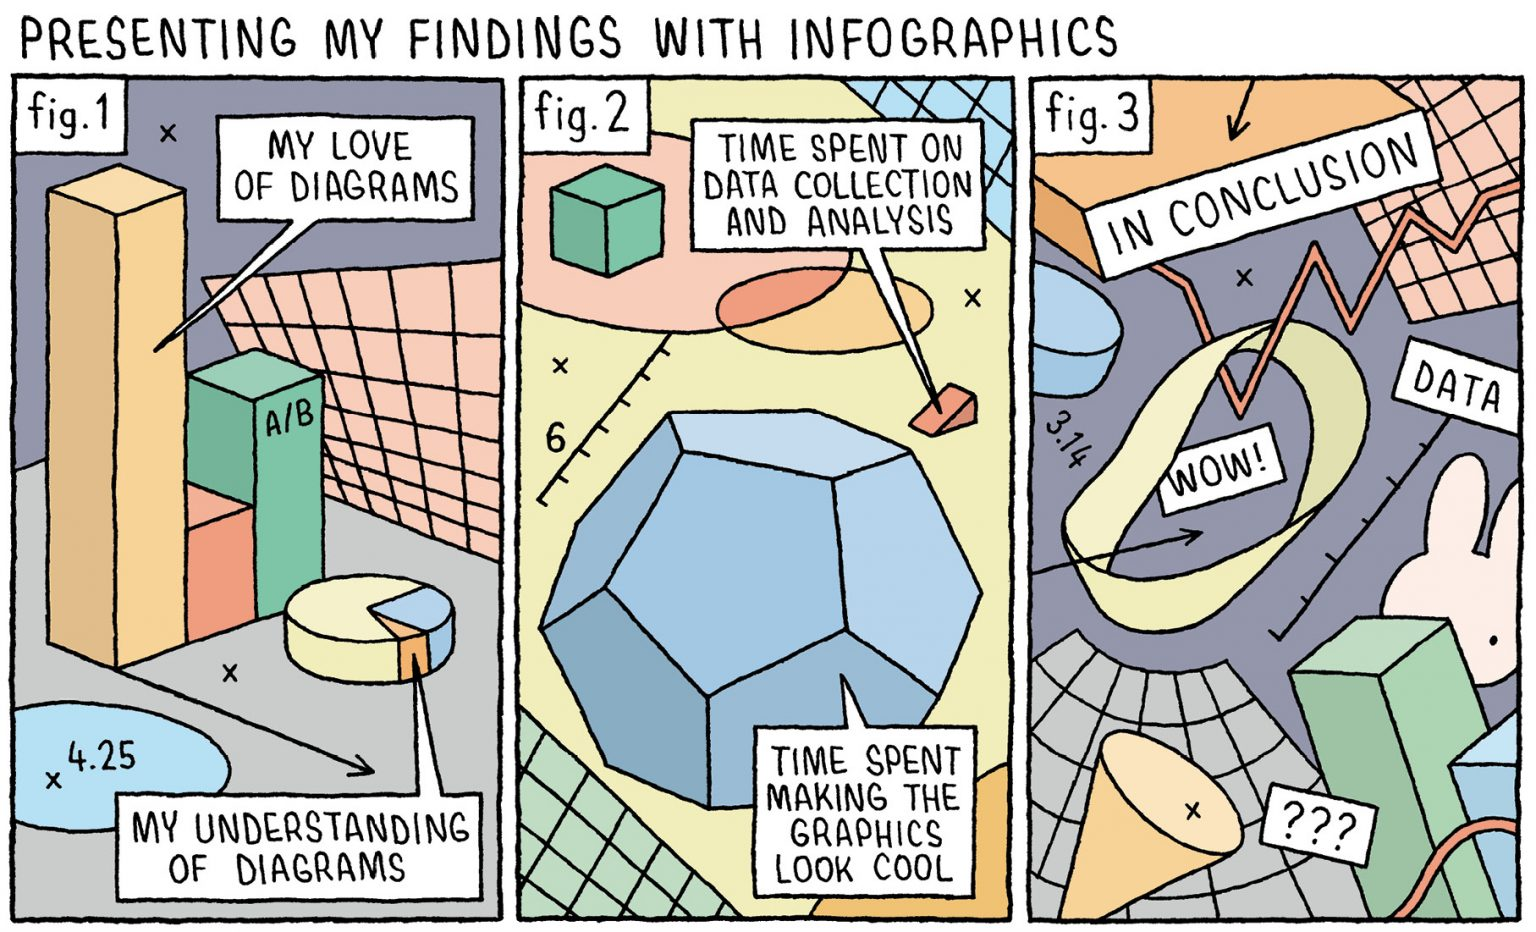

<Axes: xlabel='NBTIC1', ylabel='NBTIC2'>

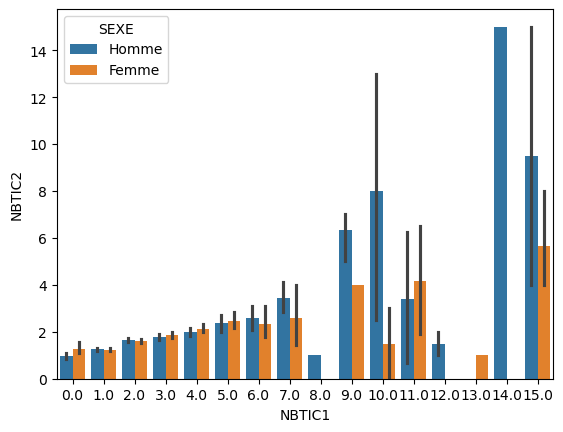

In [27]:
sb.barplot(x = "NBTIC1", y = "NBTIC2", data = df, hue = "SEXE")

On peut aussi personnalisser l'apparence visuelle de notre barplot. 

<Axes: xlabel='NBTIC1', ylabel='NBTIC2'>

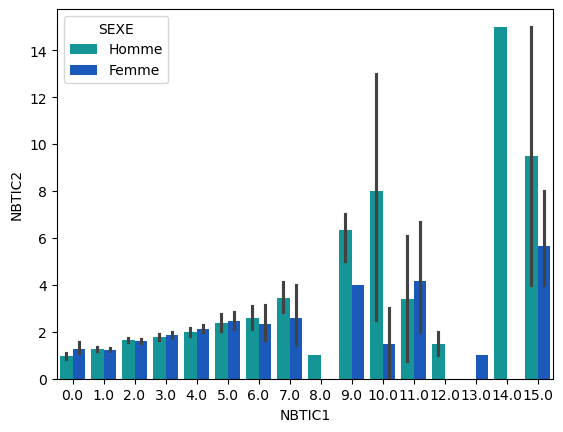

In [29]:
sb.barplot(x = "NBTIC1", y = "NBTIC2", data = df, hue = "SEXE",  
           palette = "winter_r")

On peut aussi ajouter des éléments qui favorisent la compréhensibilité du graphique, notamment un titre et des titres pour les axes. 

Text(0, 0.5, 'Nombre de téléphones')

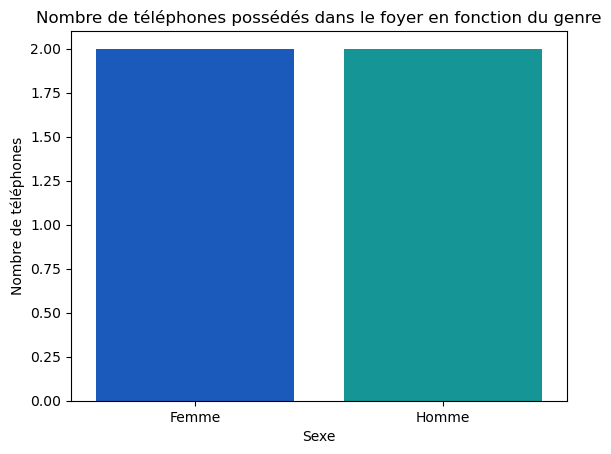

In [105]:
sb.barplot(x = "SEXE", y = "NBTIC1", data = df, hue = "SEXE",  
           palette = "winter_r", order = ["Femme", "Homme"], estimator = "median")
plt.title("Nombre de téléphones possédés dans le foyer en fonction du genre")
plt.xlabel("Sexe")
plt.ylabel("Nombre de téléphones")

On peut aussi représenter des données sous la forme d'un boxplot. Une visualisation assez pratique pour résumer une variable quantitative...

<Axes: xlabel='NBTIC1'>

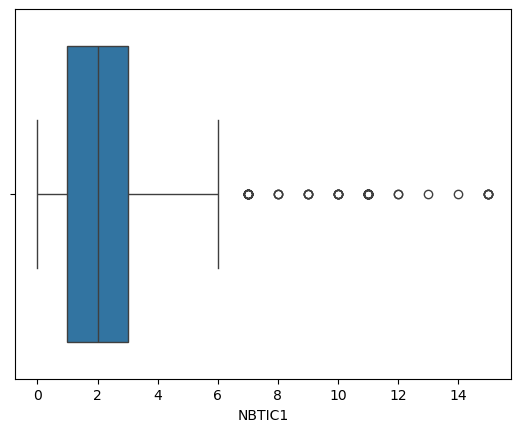

In [107]:
sb.boxplot(x = "NBTIC1", data = df)

...Voire résumer deux variables en même temps en démultipliant "les boîtes".

<Axes: xlabel='NBTIC1', ylabel='NBTIC2'>

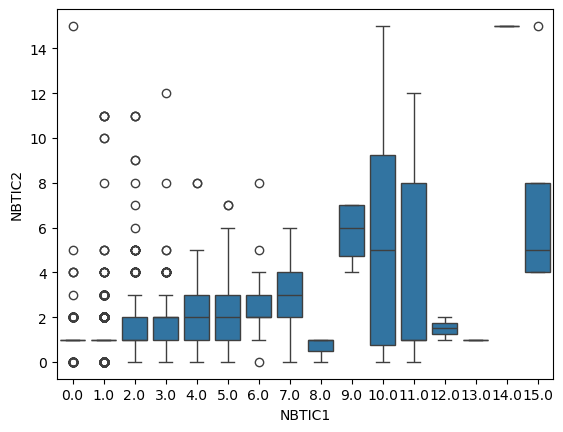

In [109]:
sb.boxplot(x = "NBTIC1", y = "NBTIC2", data = df)

Même principe avec une variable qualitative et une quantitative. On peut ici aussi ajouter des titres, personnaliser l'apparence, ... 

Text(0, 0.5, 'Genre')

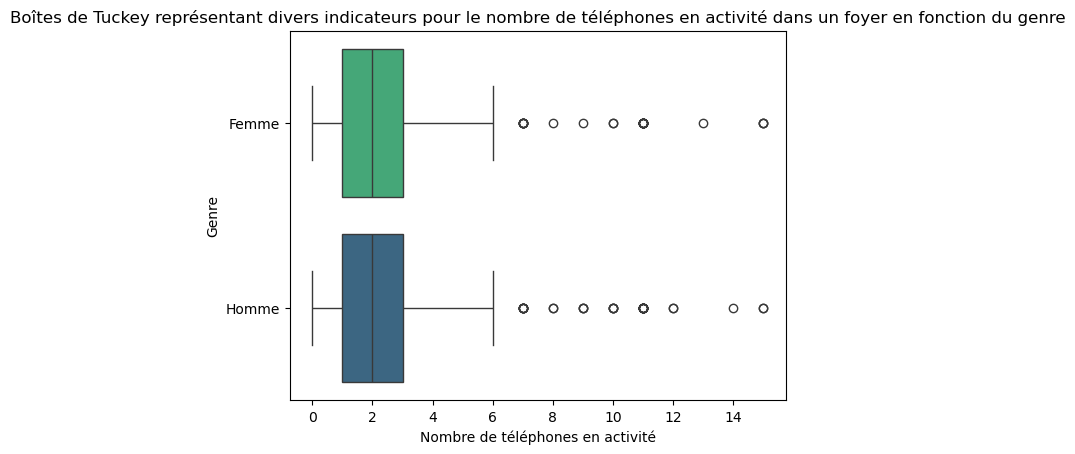

In [111]:
sb.boxplot(x = "NBTIC1", y = "SEXE", data = df, palette = "viridis", hue = "SEXE",
          order = ["Femme", "Homme"])
plt.title("Boîtes de Tuckey représentant divers indicateurs pour le nombre de téléphones en activité dans un foyer en fonction du genre")
plt.xlabel("Nombre de téléphones en activité")
plt.ylabel("Genre")

Finalement on peut produire des nuages de points. Si on utilise des variables numériques continues il est plutôt facile de le représenter. En revanche, avec des variables discrètes il est utile d'introduire de l' "entropie" ou jitter pour éloigner les points les uns des autres et éviter qu'ils ne se supperposent ce que permet de faire la fonction stripplot de seaborn. 

<Axes: xlabel='NBTIC1', ylabel='NBTIC5'>

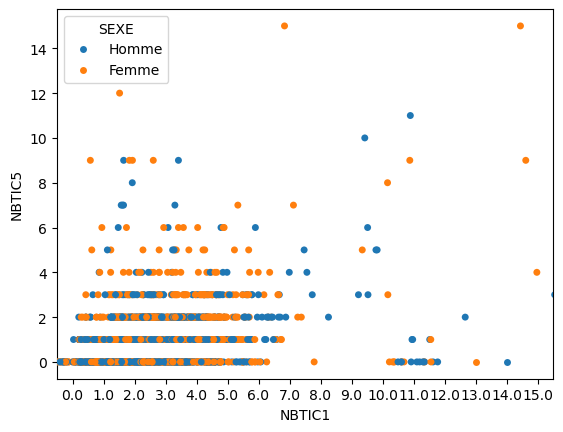

In [113]:
sb.stripplot(x = "NBTIC1", y = "NBTIC5", hue = "SEXE", data = df, jitter = 0.8)


On peut d'ailleurs la personnaliser et ajouter des titres comme pour les autres. 

Text(0, 0.5, 'Nombre de consoles')

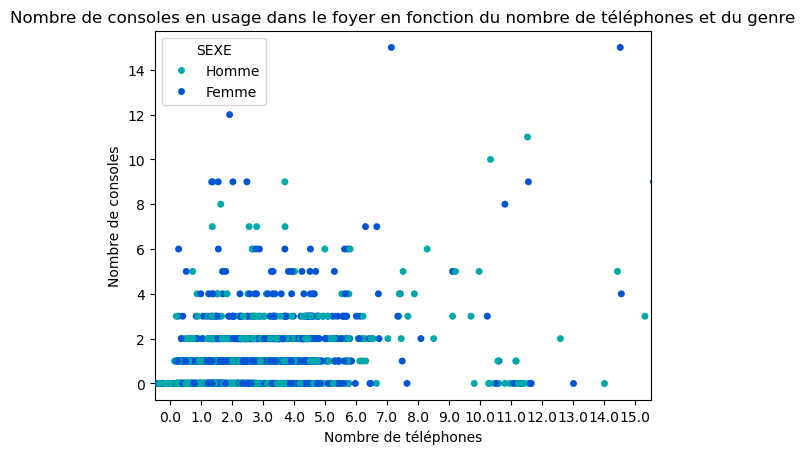

In [115]:
sb.stripplot(x = "NBTIC1", y = "NBTIC5", hue = "SEXE", data = df, jitter = 0.8, 
            palette = "winter_r")
plt.title("Nombre de consoles en usage dans le foyer en fonction du nombre de téléphones et du genre")
plt.xlabel("Nombre de téléphones")
plt.ylabel("Nombre de consoles")

Nous allons désormais tenter de répondre à plusieurs questions un peu plus sociologiques. Les données du baromètre du numérique vont nous permettre de le faire. Pour commencer demandons nous s'il y a des inégalités d'accès à la fibre en fonction de divers critères sociaux. 

In [313]:
from tabulate import tabulate

# Génération du tableau (pas très beau)
crosstab_table = pd.crosstab(df['TYPCONN2'], df['PCS8EGO'], normalize='columns') *100
crosstab_table = crosstab_table.round(2)

# Embellissement
styled_table = crosstab_table.style.format("{:.0f}").set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14px'), ('background', '#4CAF50'), ('color', 'white')]}]
).bar(color='lightblue', axis=1)

# Affichage dans Jupyter Notebook
styled_table


PCS8EGO,"Agri. exploitant, artisan, commerçant, chef d'entreprise",Autre inactif,Cadre et profession intellectuelle supérieure,Employé,Ouvrier,Personne au foyer,Profession Intermédiaire,Retraité
TYPCONN2,,,,,,,,
Non réponse,1,0,1,1,0,0,0,1
Par la fibre optique de bout en bout / FttH,52,55,66,55,47,56,63,62
Par le câble ou la fibre terminaison coaxiale,8,10,9,9,8,7,4,6
"Par un autre moyen, y compris Box 4G",7,10,4,3,5,5,3,3
Par une ligne ADSL,31,25,21,32,40,32,30,28


In [321]:
from tabulate import tabulate

# Génération du tableau (pas très beau)
crosstab_table = pd.crosstab(df['TYPCONN2'], df['DIPL5'], normalize='columns') *100
crosstab_table = crosstab_table.round(2)

# Embellissement
styled_table = crosstab_table.style.format("{:.0f}").set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14px'), ('background', '#4CAF50'), ('color', 'white')]}]
).bar(color='lightblue', axis=1)

# Affichage dans Jupyter Notebook
styled_table

DIPL5,12-17 ans,BAC,BEPC,Diplômé du supérieur,Non diplômé
TYPCONN2,,,,,
Non réponse,0,1,1,0,1
Par la fibre optique de bout en bout / FttH,63,53,58,62,56
Par le câble ou la fibre terminaison coaxiale,10,7,8,6,11
"Par un autre moyen, y compris Box 4G",1,6,4,5,6
Par une ligne ADSL,26,34,30,27,27


Maintenant posons-nous une autre question : à quel point la possession des différents équipements informatiques est-elle corrélée ? Cette fois nous devons recourir à une analyse multivariée qui permette de résumer diverses variables en même temps. Les analyses factorielles, ici l'ACM (parce que nos variables sont catégorielles, sinon une ACP) est la plus habituelle 

In [275]:
pip install fanalysis

   ---------------------------------------- 0.0/56.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/56.3 kB ? eta -:--:--
   -------------- ------------------------- 20.5/56.3 kB 217.9 kB/s eta 0:00:01
   --------------------- ------------------ 30.7/56.3 kB 262.6 kB/s eta 0:00:01
   ---------------------------------------- 56.3/56.3 kB 326.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
#On importe les packages 
import prince
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [73]:
# On crée une nouvelle base qui ne contient que les variables que l'on veut introduire
df_ACM = pd.DataFrame(df[["TELFIXE", "TABLETTE", "TABLET2", "MICRO2", "PTSMART2", "SMARTPHO", "TELMODET", "TELMOB"]])
df_ACM["TELFIXE"] = df["TELFIXE"].astype("category")
df_ACM["TABLETTE"] = df["TABLETTE"].astype("category")
df_ACM["TABLET2"] = df["TABLET2"].astype("category")
df_ACM["MICRO2"] = df["MICRO2"].astype("category")
df_ACM["PTSMART2"] = df["PTSMART2"].astype("category")
df_ACM["SMARTPHO"] = df["SMARTPHO"].astype("category")
df_ACM["TELMODET"] = df["TELMODET"].astype("category")
df_ACM["TELMOB"] = df["TELMOB"].astype("category")
df_ACM.head(5)
df_ACM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   TELFIXE   4284 non-null   category
 1   TABLETTE  4284 non-null   category
 2   TABLET2   4284 non-null   category
 3   MICRO2    4284 non-null   category
 4   PTSMART2  4284 non-null   category
 5   SMARTPHO  4284 non-null   category
 6   TELMODET  642 non-null    category
 7   TELMOB    4284 non-null   category
dtypes: category(8)
memory usage: 34.8 KB


In [81]:
# Appliquer l'ACM avec fanalysis
mca = prince.MCA(
    n_components=4,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df_ACM)

In [85]:
#On imprime les coordonnées des colonnes, autrement dit des 
#différentes modalités des variables introduites
mca.column_coordinates(df_ACM)

,0,1,2
TELFIXE__Non,0.021848,-0.047816,0.546013
TELFIXE__Non réponse,0.498719,-0.640842,0.408683
TELFIXE__Oui,-0.061881,0.015713,-0.136140
TABLETTE__Non,0.463200,-0.615702,0.646771
TABLETTE__Oui,-0.567739,0.377454,-0.680386
TABLETTE__[Nsp],1.867585,6.812632,3.591489
TABLET2__Aucun,0.463200,-0.615702,0.646771
TABLET2__Plusieurs,-0.648149,0.395374,-0.623217
TABLET2__Un,-0.540444,0.371371,-0.699793
TABLET2__[Nsp],1.867585,6.812632,3.591489


In [99]:
#Cette fois on imprime les contributions des différentes 
#modalités des variables
mca.column_contributions_.style.format('{:.0%}')

,0,1,2
TELFIXE__Non,0%,0%,4%
TELFIXE__Non réponse,0%,0%,0%
TELFIXE__Oui,0%,0%,1%
TABLETTE__Non,3%,9%,11%
TABLETTE__Oui,4%,4%,14%
TABLETTE__[Nsp],1%,34%,11%
TABLET2__Aucun,3%,9%,11%
TABLET2__Plusieurs,1%,1%,3%
TABLET2__Un,3%,3%,11%
TABLET2__[Nsp],1%,34%,11%


In [105]:
mca.plot(
   df_ACM,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=False,
    show_column_labels=True,
    show_row_labels=False
)

C:\Users\cypri\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\cypri\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\cypri\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

http://localhost:8888/files/visualization(1).svg?_xsrf=2%7Cb3a843e6%7C67dba56379799f46b78285609750f193%7C1742732138